In [1]:
import pandas as pd
import json
import os
from tqdm import tqdm

import numpy as np
from zindi_code import CLS_MAPPER
CLS_MAPPER["NEG"] = 2
CLS_MAPPER

{'Trophozoite': 0, 'WBC': 1, 'NEG': 2}

In [2]:
VALID_PTH = "zindi_data/ValDataset.csv"
PRDICTION_PTH = 'zindi_data/validation/prediction_cond-detr-50_THR0.000_IOU0.800_ID3016.csv'
THR_INF = 0.01

In [3]:
valid_data = pd.read_csv(VALID_PTH)

predictions = pd.read_csv(PRDICTION_PTH)

predictions["xmax"] =  predictions["w"] + predictions["xmin"]
predictions["ymax"] = predictions["h"] + predictions["ymin"]
predictions.sample(3)

,Image_ID,xmin,ymin,w,h,class,confidence,xmax,ymax
7211,id_0vaw9rsiro.jpg,807.10,1476.10,212.73,187.02,WBC,0.350,1019.83,1663.12
9491,id_n0sr00ncp3.jpg,1413.14,1230.28,72.48,93.86,Trophozoite,0.047,1485.62,1324.14
5041,id_w19x86t1oj.jpg,282.50,200.87,65.13,56.36,WBC,0.034,347.63,257.23


In [4]:
valid_data["w"] = valid_data["xmax"] - valid_data["xmin"]
valid_data["h"] = valid_data["ymax"] - valid_data["ymin"]

valid_data.sample(3)

,Image_ID,class,confidence,ymin,xmin,ymax,xmax,width,height,w,h
664,id_1cvkxwzx4d.jpg,WBC,1.0,1231,2367,1501,2584,4032,3016,217,270
1874,id_rdosm01ejg.jpg,Trophozoite,1.0,168,991,212,1027,1920,1080,36,44
127,id_3ntywh3ikt.jpg,NEG,1.0,0,0,0,0,4000,3000,0,0


In [5]:
len(set(valid_data["Image_ID"]).intersection(predictions["Image_ID"])), valid_data["Image_ID"].nunique()

(275, 275)

In [6]:
import random


image_id = random.choice(valid_data["Image_ID"].unique())
image_id

'id_jl93f5rtzc.jpg'

In [7]:
from PIL import Image, ImageDraw
import os

cols = ["xmin", "ymin", "xmax", "ymax"]
color_map = {"Trophozoite": "red", "WBC": "blue"}
color_map_test = {"Trophozoite": "yellow", "WBC": "green"}


def draw(image_id: str):
	img = Image.open(os.path.join("zindi_data/images", image_id))
	draw = ImageDraw.Draw(img)
	
	raw = predictions[(predictions["Image_ID"] == image_id) & (predictions["class"] != "NEG")]
	for _, line in raw.iterrows():
		draw.rectangle([line[i] for i in cols], fill=None, outline=color_map_test[line["class"]])
	
	raw = valid_data[(valid_data["Image_ID"] == image_id) & (valid_data["class"] != "NEG")]
	for _, line in raw.iterrows():
		draw.rectangle([line[i] for i in cols], fill=None, outline=color_map[line["class"]])
	return img

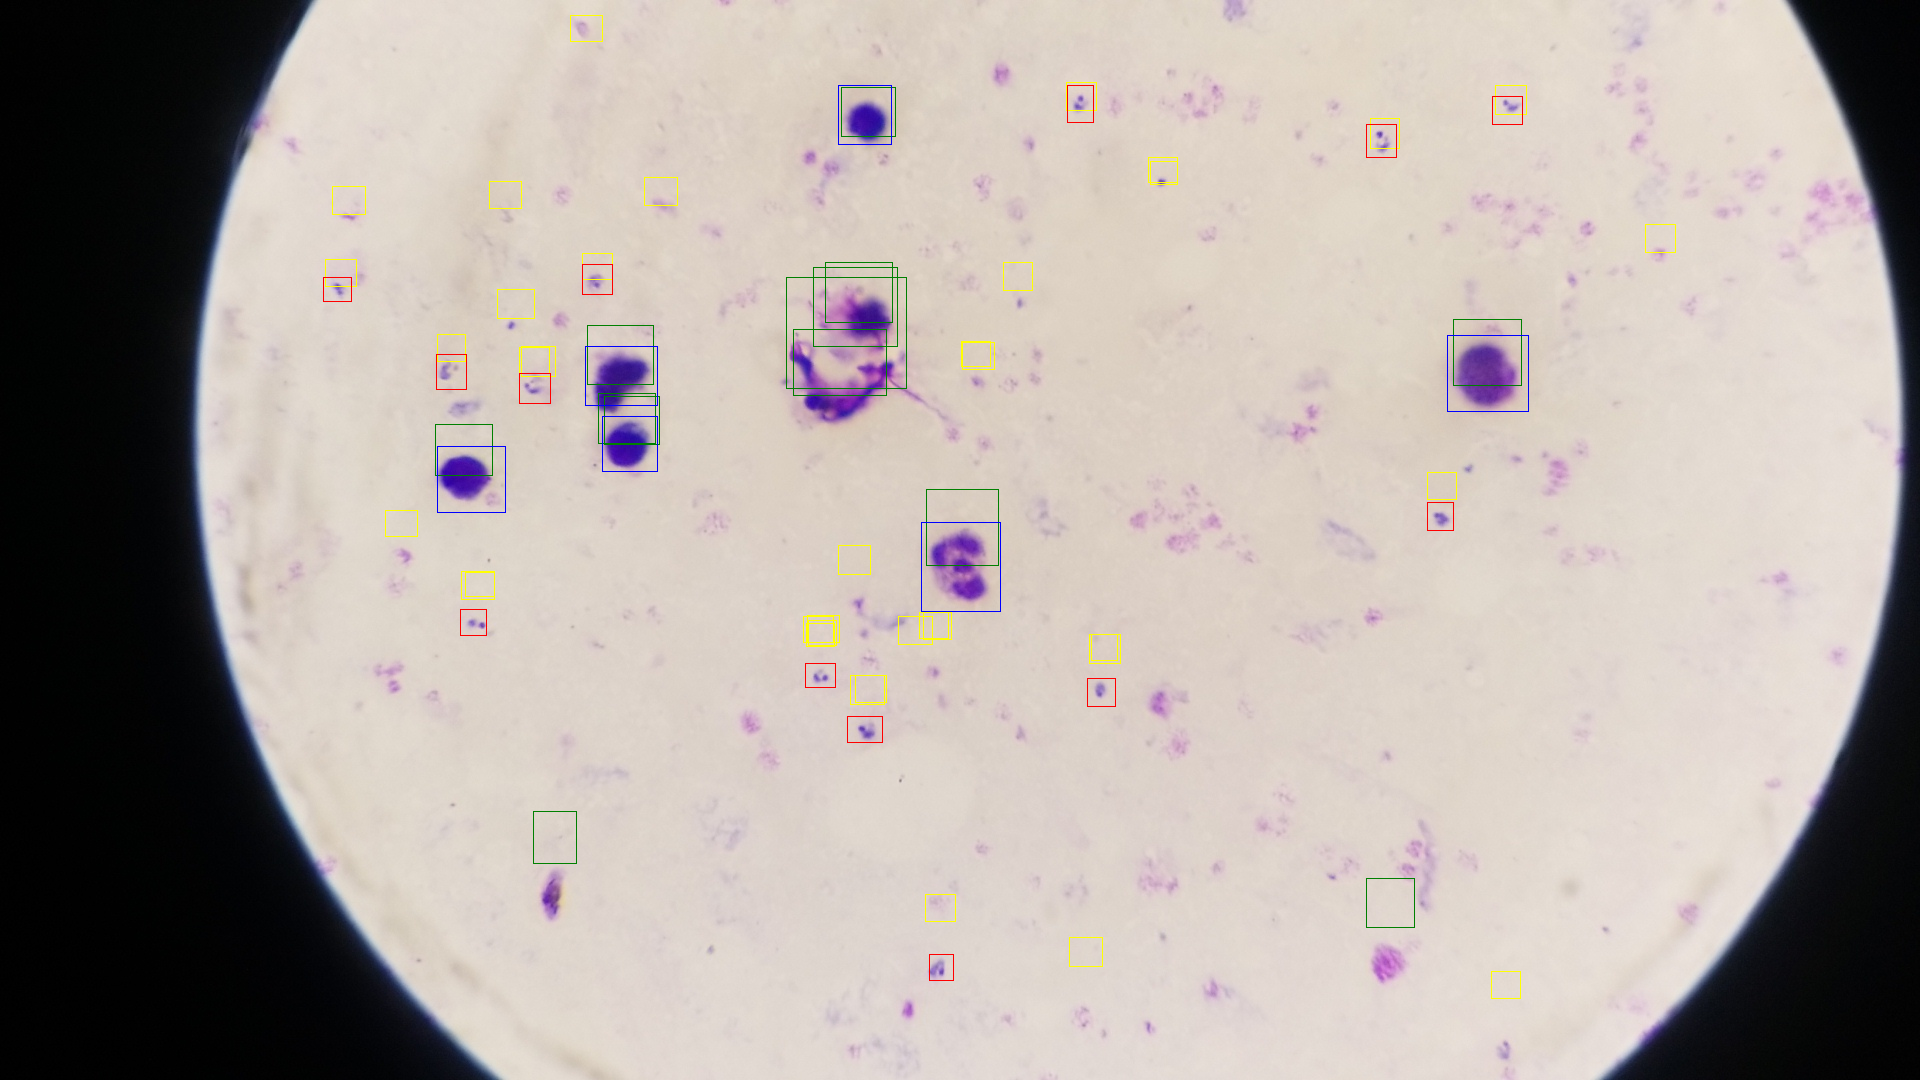

In [8]:
draw(image_id)